<a href="https://colab.research.google.com/github/leticiafcarvalho/Calculo-de-M-tricas-de-Avalia-o-de-Aprendizado/blob/main/Calculo_de_M%C3%A9tricas_de_Avalia%C3%A7%C3%A3o_de_Aprendizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [9]:
# Função para calcular as métricas de avaliação
def calcular_metricas(VP, VN, FP, FN):
    """
    Função para calcular métricas de avaliação de desempenho.

    Parâmetros:
        VP: Verdadeiros Positivos
        VN: Verdadeiros Negativos
        FP: Falsos Positivos
        FN: Falsos Negativos

    Retorna:
        Um dicionário com os valores de Acurácia, Sensibilidade (Recall),
        Especificidade, Precisão e F-Score.
    """

     # Acurácia
    N = VP + VN + FP + FN
    acuracia = (VP + VN) / N if N != 0 else 0

    # Sensibilidade (Recall)
    sensibilidade = VP / (VP + FN) if (VP + FN) != 0 else 0

    # Especificidade
    especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0

    # Precisão
    precisao = VP / (VP + FP) if (VP + FP) != 0 else 0

     # F-Score
    if (precisao + sensibilidade) != 0:
        f_score = 2 * (precisao * sensibilidade) / (precisao + sensibilidade)
    else:
        f_score = 0

    # Retorna os resultados em um dicionário
    return {
        "Acurácia": acuracia,
        "Sensibilidade (Recall)": sensibilidade,
        "Especificidade": especificidade,
        "Precisão": precisao,
        "F-Score": f_score
    }

In [10]:
# Exemplo de dados (substitua pelos seus dados reais)
y_true = [0, 1, 1, 0, 1, 0, 1, 0, 1, 1]  # Rótulos verdadeiros
y_pred_prob = [0.1, 0.8, 0.7, 0.2, 0.9, 0.4, 0.85, 0.6, 0.95, 0.3]  # Probabilidades previstas para a classe positiva

In [11]:
# Calculando a matriz de confusão
VP = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 1 and p >= 0.5)  # Verdadeiros Positivos
VN = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 0 and p < 0.5)  # Verdadeiros Negativos
FP = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 0 and p >= 0.5)  # Falsos Positivos
FN = sum(1 for t, p in zip(y_true, y_pred_prob) if t == 1 and p < 0.5)  # Falsos Negativos

In [12]:
# Calculando métricas de desempenho
metricas = calcular_metricas(VP, VN, FP, FN)

In [13]:
# Exibindo as métricas
print("Métricas de Avaliação:")
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.4f}")

Métricas de Avaliação:
Acurácia: 0.8000
Sensibilidade (Recall): 0.8333
Especificidade: 0.7500
Precisão: 0.8333
F-Score: 0.8333


In [14]:
# Calcular as taxas de verdadeiros positivos (TPR) e falsos positivos (FPR)
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)


In [15]:
# Calcular a área sob a curva (AUC)
roc_auc = auc(fpr, tpr)

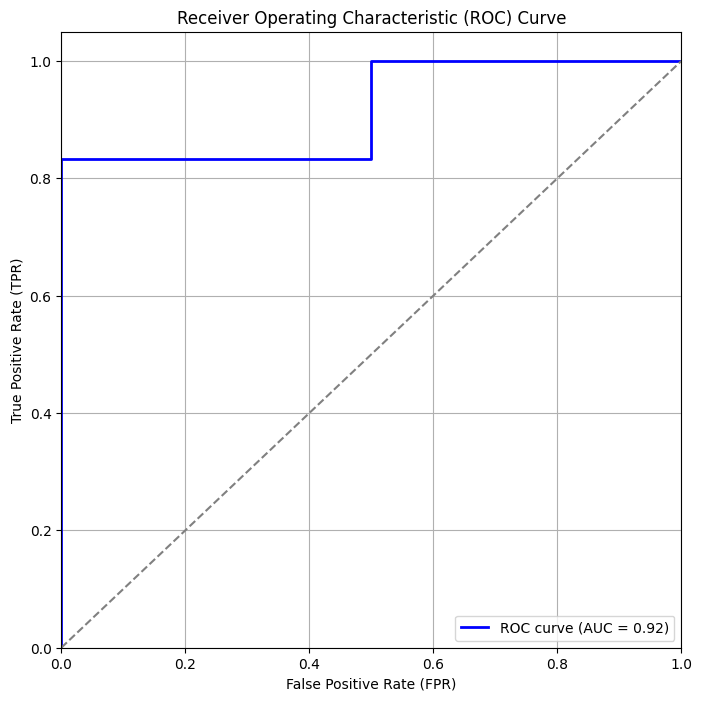

In [16]:
# Plotar a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Linha diagonal (chance aleatória)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()